In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import dsn.lib.LowRank.Fig1_Spontaneous.fct_mf as mf

from dsn.util.tf_DMFT_solvers import rank2_CDD_static_solve

DTYPE = tf.float64

n = 1
cA = 0.0

_delta_0_init = 10.0*np.ones((n,))

_g = 0.8*np.ones((n,))
_rhom = 1.6*np.ones((n,)) 
_rhon = 3.0*np.ones((n,))
_betam = 0.6*np.ones((n,))
_betan = 1.0*np.ones((n,))

kappa1_init = tf.placeholder(dtype=DTYPE, shape=(n,))
kappa2_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_inf_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
rhom = tf.placeholder(dtype=DTYPE, shape=(n,))
rhon = tf.placeholder(dtype=DTYPE, shape=(n,))
betam = tf.placeholder(dtype=DTYPE, shape=(n,))
betan = tf.placeholder(dtype=DTYPE, shape=(n,))

its = 500
eps  = 0.2

gqp = 50


In [2]:
cB = 0.0
kappa_sign = -1.0

gammaA = 0.08*np.ones((n,))
gammaB = -0.14*np.ones((n,))


_kappa1_init = kappa_sign*2.2*np.ones((n,))
_kappa2_init = kappa_sign*2.0*np.ones((n,))

kappa1, kappa2, delta_0, z, xs = rank2_CDD_static_solve(kappa1_init, kappa2_init, delta_0_init, \
                                                 cA, cB, \
                                                 g, rhom, rhon, betam, betan, \
                                                 gammaA, gammaB, \
                                                 its, eps, gauss_quad_pts=gqp, db=True)

feed_dict = {kappa1_init:_kappa1_init, kappa2_init:_kappa2_init, delta_0_init:_delta_0_init, \
             g:_g, rhom:_rhom, rhon:_rhon, betam:_betam, betan:_betan}

with tf.Session() as sess:
    _kappa1, _kappa2, _delta_0, _z, _xs = sess.run([kappa1, kappa2, delta_0, z, xs], feed_dict)

print(_xs.shape)


(1, 3, 501)


[0.2732919]


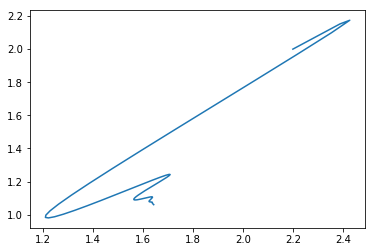

In [4]:
plt.plot(_xs[0,0,:], _xs[0,1,:])
print(_z)